In [1]:
%pylab inline

import cosima_cookbook as cc
import xarray as xr
import scipy as sp
import pandas as pd
import IPython.display
from dask.distributed import Client, progress
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
netcdf_index loaded.


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 39343:127.0.0.1:39343 vdi-n4.nci.org.au -l ss2778


Client Scheduler: tcp://127.0.0.1:38496 Dashboard: http://127.0.0.1:39343/status,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [9]:
aviso_clim_tstart = pd.to_datetime('1980', format='%Y')
aviso_clim_tend = aviso_clim_tstart + pd.DateOffset(years=10)
firstyear = pd.to_datetime(aviso_clim_tstart).year  # assumes tstart is 1 January!
lastyear = pd.to_datetime(aviso_clim_tend).year-1  # assumes tend is 1 January!
yearrange = str(firstyear)+'-'+str(lastyear)
print(yearrange)
print('aviso_clim_tstart = ', aviso_clim_tstart)
print('aviso_clim_tend = ', aviso_clim_tend)

1980-1989
aviso_clim_tstart =  1980-01-01 00:00:00
aviso_clim_tend =  1990-01-01 00:00:00


In [10]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [11]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
 
sl = cc.get_nc_variable(expt,'ocean_month.nc','sea_level',
                                n=n_files,time_units=time_units, offset=offset,use_cache=False)\
                                 .sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).load()
sl_sq = cc.get_nc_variable(expt,'ocean_month.nc','sea_levelsq',
                            n=n_files,time_units=time_units, offset=offset,use_cache=False)\
                             .sel(time=slice(aviso_clim_tstart,aviso_clim_tend)).load()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.impl.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 671, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 858, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 502, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139735785887488 and this is thread id 139734345053952.
ERROR:sqlalchemy.pool.impl.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f16751ecd50>
Traceback (most recent call last):
  File "/g/data3/hh5/public/

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.impl.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 671, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/sqlalchemy/pool/base.py", line 858, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 502, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139735785887488 and this is thread id 139734345053952.
ERROR:sqlalchemy.pool.impl.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f1675debab0>
Traceback (most recent call last):
  File "/g/data3/hh5/public/

In [12]:
%%time
x=sl.rolling(time=6,center=True).mean();
y=sl_sq.rolling(time=6,center=True).mean();

MemoryError: 

In [9]:
var_six= (y - x**(2.0));
var_six.load();

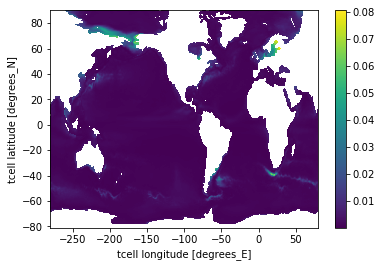

In [29]:
var_six.mean('time').plot()